# Optimizers

Optimizers are a key part of the algorithms that train neural networks. The original optimizer is gradient descent, and the concept of gradient descent is effectively the foundation of all optmizers (as well as fundamental to machine learning). Unlike activation functions, optimzers are a part of training the network, not a component of the network itself. In fact, the same optimizers that are used in Deep Neural Networks are used in a variety of other machine learning models as well.

Optimizers, and the parameters of optimizers, can have profound impacts on training. Similar to activation functions, there isn't a "one true optimizer". Different optimizers might perform better on different datasets or in different neural network architectures. Once again, empirical testing is a good way to suss out the effectiveness of an optimizer. 

In this lab we're going to explore several different optimizers in the context of two deep nerual network architectures and continue using the MNIST digits dataset. 

In [1]:
# Setting up MNST, this should look familiar:
from matplotlib import pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

mnist_num_classes = 10 
mnist_image_size = 784

(mnist_training_images, mnist_training_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()
mnist_training_data = mnist_training_images.reshape(mnist_training_images.shape[0], mnist_image_size) 
mnist_test_data = mnist_test_images.reshape(mnist_test_images.shape[0], mnist_image_size)

mnist_training_labels = to_categorical(mnist_training_labels, mnist_num_classes)
mnist_test_labels = to_categorical(mnist_test_labels, mnist_num_classes)

Using TensorFlow backend.


In [2]:
# A helpful function we'll be using all over the place to plot training information:
def plot_training_history(history, model, name, time):
    figure = plt.figure()
    figure.suptitle(name)
    plt.subplot(1, 2, 1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    figure.tight_layout()
    plt.show()
    
    loss, accuracy  = model.evaluate(mnist_test_data, mnist_test_labels, verbose=False)
    print(f'Trained in {time} seconds')
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')
    


In [3]:
# Our first model
def fresh_model_1():
    model_1 = Sequential()
    model_1.add(Dense(units=256, activation='relu', input_shape=(mnist_image_size,)))
    model_1.add(Dense(units=mnist_num_classes, activation='softmax'))
    
    return model_1

# Our second model:
def fresh_model_2():
    model_2 = Sequential()
    model_2.add(Dense(units=64, activation='relu', input_shape=(mnist_image_size,)))
    model_2.add(Dense(units=64, activation='relu'))
    model_2.add(Dense(units=64, activation='relu'))
    model_2.add(Dense(units=64, activation='relu'))
    model_2.add(Dense(units=64, activation='relu'))
    model_2.add(Dense(units=64, activation='relu'))
    model_2.add(Dense(units=mnist_num_classes, activation='softmax'))
    
    return model_2

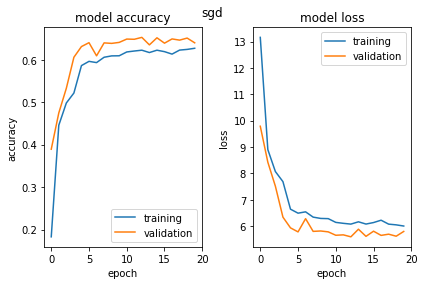

Trained in 74.13106099999993 seconds
Test loss: 6.21
Test accuracy: 0.614


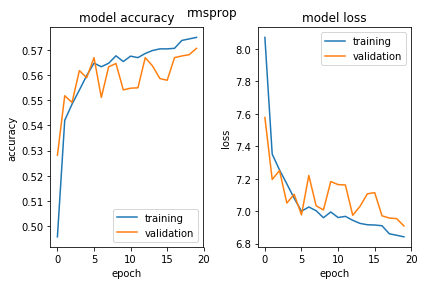

Trained in 91.195017 seconds
Test loss: 6.84
Test accuracy: 0.575


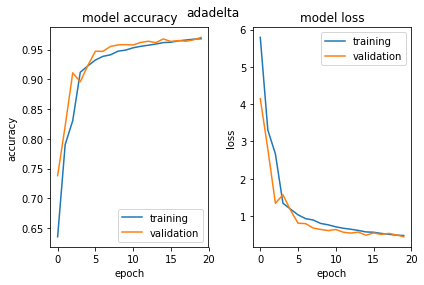

Trained in 122.8481670000001 seconds
Test loss: 0.543
Test accuracy: 0.964


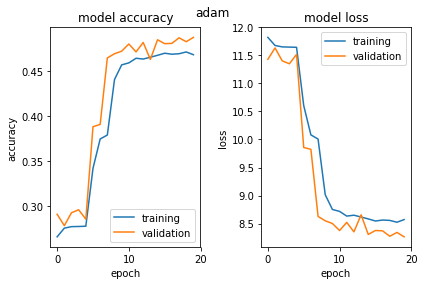

Trained in 120.65290000000005 seconds
Test loss: 8.36
Test accuracy: 0.481


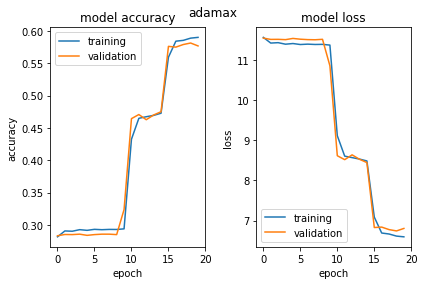

Trained in 119.2166850000001 seconds
Test loss: 6.61
Test accuracy: 0.589


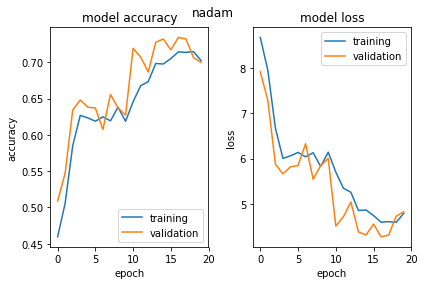

Trained in 135.3000770000001 seconds
Test loss: 5.0
Test accuracy: 0.69


In [8]:
import time # Because we care about the speed of these optimizers too!

optimizers = [
    'sgd',
    'rmsprop',
    'adadelta',
    'adam',
    'adamax',
    'nadam'
]

# So we can plot them on one chart
histories = []

for optimizer in optimizers:
    model = fresh_model_1()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    start = time.process_time()
    history = model.fit(mnist_training_data, mnist_training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
    stop = time.process_time()
    plot_training_history(history, model, optimizer, stop - start)
    histories.append(history)

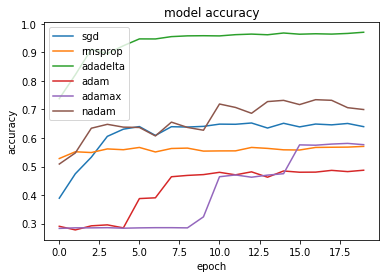

In [9]:
# Cleaner visulizations all in one place
for optimizer, history in zip(optimizers, histories):
    plt.plot(history.history['val_acc'])
    
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(optimizers, loc='best')
plt.show()

Note the dramatic differences between the validation accuracies! This is also a sign that this model is not excellent, otherwise more of the optimizers would work. 

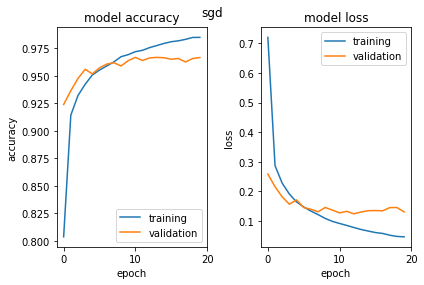

Trained in 44.59707400000002 seconds
Test loss: 0.171
Test accuracy: 0.958


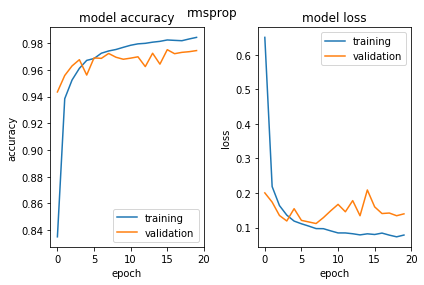

Trained in 50.2310930000001 seconds
Test loss: 0.191
Test accuracy: 0.969


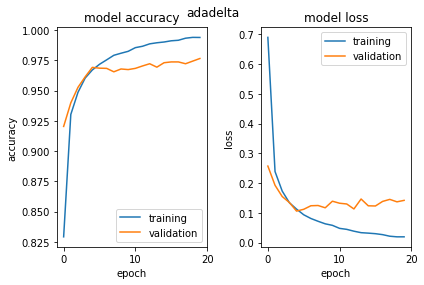

Trained in 62.890151999999944 seconds
Test loss: 0.179
Test accuracy: 0.971


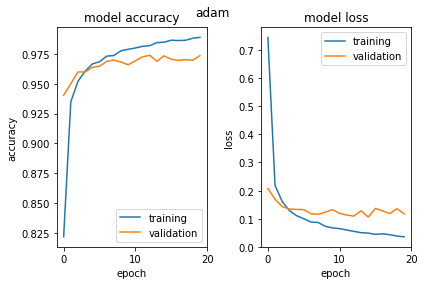

Trained in 58.07648900000004 seconds
Test loss: 0.142
Test accuracy: 0.968


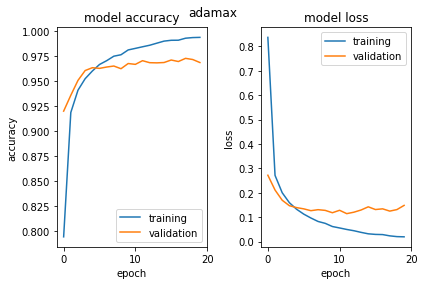

Trained in 63.11103800000001 seconds
Test loss: 0.175
Test accuracy: 0.965


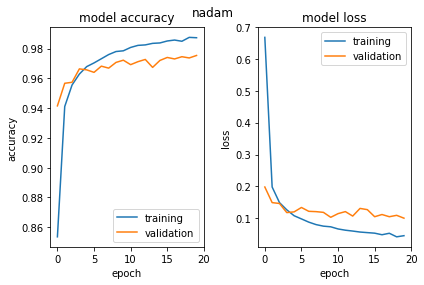

Trained in 62.51663800000006 seconds
Test loss: 0.134
Test accuracy: 0.968


In [10]:
histories = []

for optimizer in optimizers:
    model = fresh_model_2()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    start = time.process_time()
    history = model.fit(mnist_training_data, mnist_training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
    stop = time.process_time()
    plot_training_history(history, model, optimizer, stop - start)
    histories.append(history)

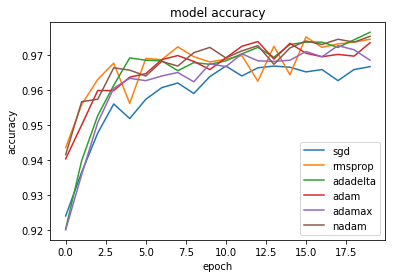

In [11]:
# Cleaner visulizations all in one place
for optimizer, history in zip(optimizers, histories):
    plt.plot(history.history['val_acc'])
    
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(optimizers, loc='best')
plt.show()

We can tell this model is much better, and all of the optimizers are able to achieve a 90%+ accuracy.

It's also worth noting that all of these optimizers have their own hyper-parameters that can be fined tuned even further. These paramters, such as the learning rate, can impact the size of the adjustments we make beyond the definition of these algorithms. 

The Keras documentation and ML-Cheatsheet both provide documentation on these hyper-paramters, which can be worth exploring:

* [Keras Docs](https://keras.io/optimizers/)
* [ML Cheatsheet](https://ml-cheatsheet.readthedocs.io/en/latest/optimizers.html#rmsprop)